In [84]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import time

import blimpy as bl

import sys, os, glob
sys.path.insert(0, "../../setigen")
import setigen as stg

In [2]:
obs_fn = '/datax/scratch/bbrzycki/random_transiter/data/spliced_blc40414243444546o7o0515253545556o7o0616263646566o7o071727374757677_guppi_58667_16235_HD139139_0029.gpuspec.0000.h5'
# bl.read_header(obs_fn)

In [3]:
obs_fn = '/datax/scratch/bbrzycki/old/data/blc00_guppi_58331_12383_DIAG_SGR_B2_0014.gpuspec.0000.fil'
bl.read_header(obs_fn)

{b'rawdatafile': b'guppi_58331_12383_DIAG_SGR_B2_0014.0000.raw',
 b'source_name': b'DIAG_SGR_B2',
 b'machine_id': 20,
 b'telescope_id': 6,
 b'src_raj': <Angle 17.78900667 hourangle>,
 b'src_dej': <Angle -28.3854 deg>,
 b'az_start': 0.0,
 b'za_start': 0.0,
 b'data_type': 1,
 b'fch1': 3151.464842353016,
 b'foff': -2.7939677238464355e-06,
 b'nchans': 67108864,
 b'nbeams': 1,
 b'ibeam': 1,
 b'nbits': 32,
 b'tstart': 58331.14332175926,
 b'tsamp': 18.253611008,
 b'nifs': 1}

In [4]:
frame_itr = stg.split_fil_generator(obs_fn, 1024)
frame_itr

<generator object split_fil_generator at 0x7efc68e5d9d0>

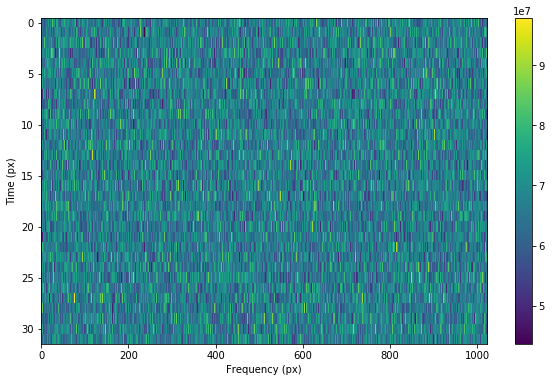

In [60]:
fil = next(frame_itr)
frame = stg.Frame(fil=fil)

frame.tchans = 32
frame.data = frame.data[:frame.tchans, :]
frame.shape = frame.data.shape

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency (px)')
plt.ylabel('Time (px)')
plt.colorbar()

plt.show()

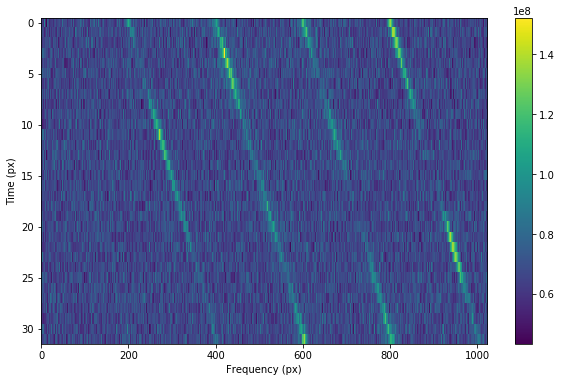

In [33]:
num_signals = 4

p = 2
tscint = 100
rho = stg.get_rho(frame.ts, tscint, p)

Z = stg.build_Z(rho, frame.tchans * num_signals)
Y = stg.get_Y(Z)
# print(stg.autocorrelation(Y, p+1)[1:])


signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], drift_rate=1*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[400], drift_rate=1*u.Hz/u.s),
                          Y[frame.tchans:2*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[600], drift_rate=1*u.Hz/u.s),
                          Y[2*frame.tchans:3*frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.constant_path(f_start=frame.fs[800], drift_rate=1*u.Hz/u.s),
                          Y[3*frame.tchans:] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency (px)')
plt.ylabel('Time (px)')
plt.colorbar()

plt.show()

3151.4533982612193


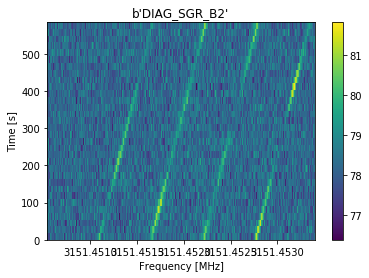

In [37]:
frame._update_fil()
frame.fil.plot_waterfall()

print(frame.header[b'fch1'])

extracting integration 0...


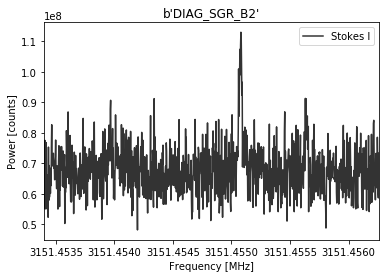

In [31]:
frame.fil.plot_spectrum()

In [43]:
np.random.randint(frame.fchans)

281

In [48]:
(frame.fchans - 200) * frame.df / (frame.dt * frame.tchans)

3.9413937799767162

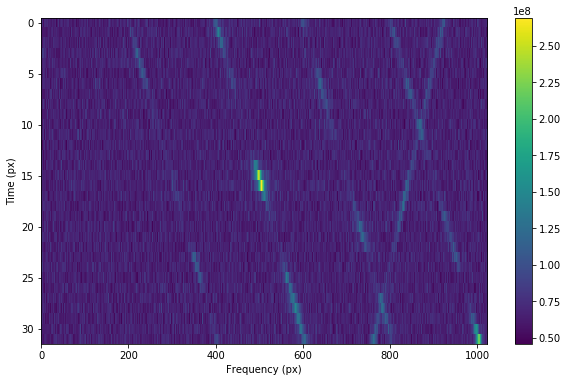

In [85]:
p = 2
tscint = 100
rho = stg.get_rho(frame.ts, tscint, p)

Z = stg.build_Z(rho, frame.tchans)
Y = stg.get_Y(Z)

start_index = np.random.randint(frame.fchans)
end_index = np.random.uniform(0, frame.fchans) 
drift_rate = (end_index - start_index) * frame.df / (frame.dt * frame.tchans)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[start_index], drift_rate=drift_rate*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency (px)')
plt.ylabel('Time (px)')
plt.colorbar()

plt.show()

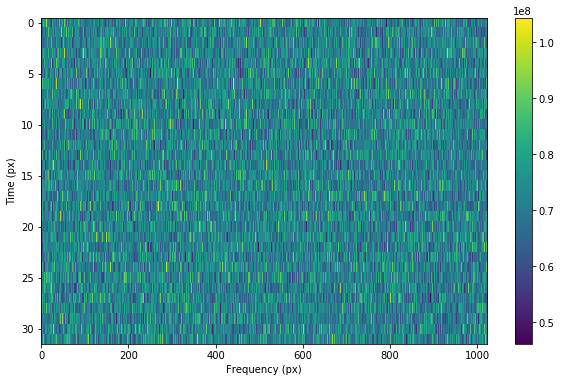

19.16428757781428
1.049890214567143


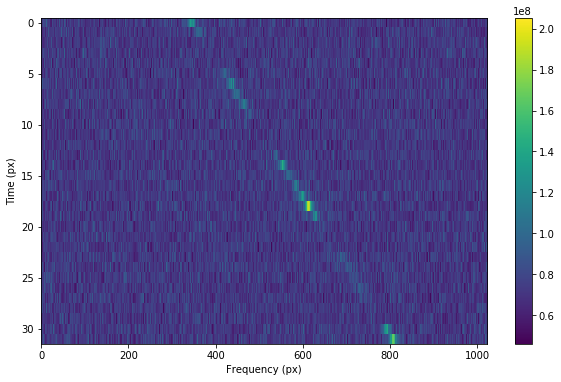

In [130]:
fil = next(frame_itr)
frame = stg.Frame(fil=fil)

frame.tchans = 32
frame.data = frame.data[:frame.tchans, :]
frame.shape = frame.data.shape

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency (px)')
plt.ylabel('Time (px)')
plt.colorbar()

plt.show()



p = 2

tscint = np.random.normal(30, 10)
while a < 20:
    tscint = np.random.normal(30, 10)


print(tscint)
print(tscint / frame.dt)
rho = stg.get_rho(frame.ts, tscint, p)

Z = stg.build_Z(rho, frame.tchans)
Y = stg.get_Y(Z)

start_index = np.random.randint(frame.fchans)
end_index = np.random.uniform(0, frame.fchans) 
drift_rate = (end_index - start_index) * frame.df / (frame.dt * frame.tchans)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[start_index], drift_rate=drift_rate*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.lorentzian_f_profile(width=30*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency (px)')
plt.ylabel('Time (px)')
plt.colorbar()

plt.show()

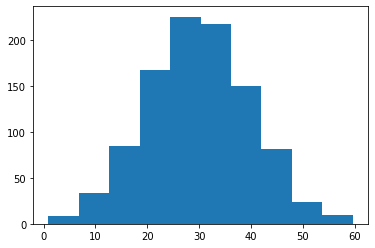

In [105]:
x = np.random.normal(30, 10, 1000)
plt.hist(x)
plt.show()

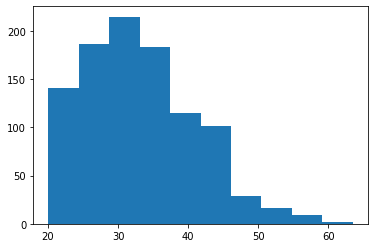

In [111]:
x = []
for i in range(1000):
    a = np.random.normal(30, 10)
    while a < 20:
        a = np.random.normal(30, 10)
    x.append(a)
plt.hist(x)
plt.show()

In [122]:
a = np.random.normal(30, 10)
while a < 20:
    a = np.random.normal(30, 10)
a

24.828339851294462

dt: 4.563402752
131


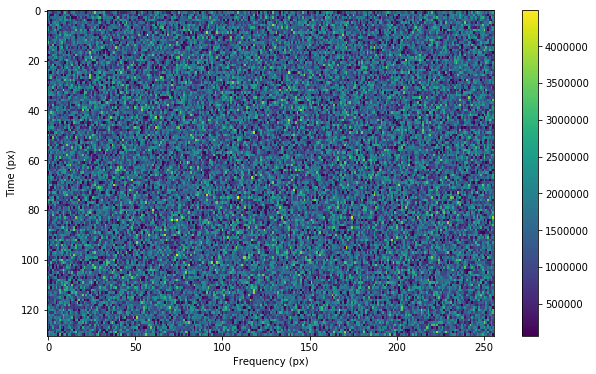

39.707195889187595
8.701225389712786


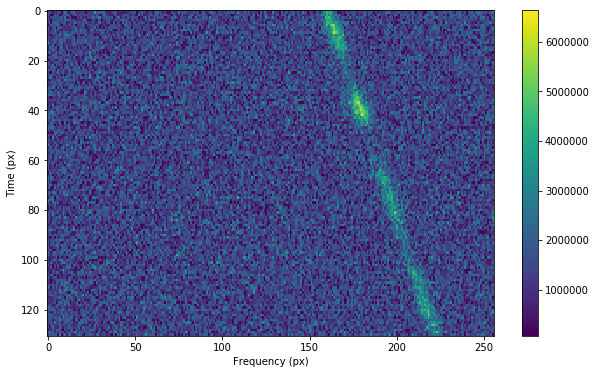

In [160]:
obs_length = 600

dt = 18.253611008/4
print('dt:', dt)


# dt=10
frame = stg.Frame(fchans=256,
                  tchans=int(obs_length / dt),
                  df=2.7939677238464355*u.Hz,
                  dt=dt*u.s)
print(frame.tchans)
noise = frame.add_noise_from_obs()


fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency (px)')
plt.ylabel('Time (px)')
plt.colorbar()

plt.show()



p = 2

tscint = np.random.normal(30, 10)
while tscint < 20:
    tscint = np.random.normal(30, 10)


print(tscint)
print(tscint / frame.dt)
rho = stg.get_rho(frame.ts, tscint, p)

Z = stg.build_Z(rho, frame.tchans)
Y = stg.get_Y(Z)

start_index = np.random.randint(frame.fchans)
end_index = np.random.uniform(0, frame.fchans) 
drift_rate = (end_index - start_index) * frame.df / (frame.dt * frame.tchans)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[start_index], drift_rate=drift_rate*u.Hz/u.s),
                          Y[:frame.tchans] * frame.compute_intensity(25),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.xlabel('Frequency (px)')
plt.ylabel('Time (px)')
plt.colorbar()

plt.show()